In [1]:
import pandas as pd

In [2]:
salaries = pd.read_csv('archive/salaries.csv')
salaries.tail(10)

C:\Users\PC-MOH\AppData\Local\Temp\ipykernel_3348\631627704.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  salaries = pd.read_csv('archive/salaries.csv')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


## EDA: Exploratory Data Analysis

In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [5]:
# What is the average Basepay
salaries['BasePay'] = pd.to_numeric(salaries['BasePay'], errors='coerce') # 'coerce' : Instead of throwing error replace with NaN "not provided" values
print(salaries['BasePay'].dtype)
salaries['BasePay'].mean().round(2)

float64


66325.45

In [6]:
# What is the highest amount of OverTimePay in the dataset
salaries['OvertimePay'] = pd.to_numeric(salaries['OvertimePay'], errors='coerce')  
print(salaries['OvertimePay'].dtype)
salaries['OvertimePay'].max()

float64


245131.88

In [7]:
salaries[salaries['OvertimePay'] == salaries['OvertimePay'].max()][["JobTitle", "OvertimePay"]]

,JobTitle,OvertimePay
1,CAPTAIN III (POLICE DEPARTMENT),245131.88


In [8]:
# What is the job title of JOSEPH DRISCOLL? 
# NOTE: Use all caps, otherwise you may get an answer that doesn't match up (There is also a lowercase Joseph Driscoll)
salaries[salaries['EmployeeName'].str.strip().str.upper() == 'JOSEPH DRISCOLL'][['EmployeeName', 'JobTitle']]

,EmployeeName,JobTitle
24,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION"
36198,Joseph Driscoll,"Captain, Fire Suppression"


In [9]:
# Top paid JobTitles in each year
top_paid_jobs = salaries.groupby(by='Year', sort=True, )['TotalPay'].max()
top_paid_jobs

# Merge the top paid jobs with the original DataFrame to get the JobTitle
merged_top_paid_jobs = pd.merge(salaries[['JobTitle', 'Year', 'TotalPay']], top_paid_jobs, 
                                on=['Year', 'TotalPay'],
                                how='right').sort_values(by='Year', ascending=False)
merged_top_paid_jobs

,JobTitle,Year,TotalPay
3,Deputy Chief 3,2014,471952.64
2,"Battalion Chief, Fire Suppress",2013,347102.32
1,"Lieutenant, Fire Suppression",2012,362844.66
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2011,567595.43


In [10]:
# How much does JOSEPH DRISCOLL make (including benefits)?
salaries[salaries['EmployeeName'].str.rstrip().str.upper() == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24       270324.91
36198    331834.79
Name: TotalPayBenefits, dtype: float64

In [11]:
# What is the name of the highest papid person (including benefits)?
salaries[salaries['TotalPayBenefits'] == salaries['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [12]:
# What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?
salaries[salaries['TotalPayBenefits'] == salaries['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [13]:
# List of employees with negative TotalPayBenefits
# This could indicate an error in the data or a specific case where an employee had deductions that resulted in a negative total pay.
salaries[salaries['TotalPayBenefits'] < 0 ]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.00,-8.20,2013,NaN,San Francisco,NaN
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.0,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [14]:
# Keep only positive values
positive_salaries = salaries[salaries['TotalPayBenefits'] > 0]
positive_salaries['TotalPayBenefits'].describe()

count    148620.000000
mean      93713.993445
std       62784.714471
min           0.300000
25%       44132.715000
50%       92419.380000
75%      132887.897500
max      567595.430000
Name: TotalPayBenefits, dtype: float64

In [15]:
# What was the average (mean) BasePay of all employees per year?
salaries.groupby('Year')[["TotalPay", "BasePay"]].mean()

,TotalPay,BasePay
Year,,
2011,71744.103871,63595.956517
2012,74113.262265,65436.406857
2013,77611.443142,69630.030216
2014,75463.918140,66564.421924


In [16]:
# How many unique JobTitles are there?
print("Unique Job titles:", salaries['JobTitle'].nunique())

Unique Job titles: 2159


In [17]:
# What are the top 5 most common Jobs?
top_5_jobs = salaries['JobTitle'].str.strip().str.title().value_counts()[:5]
top_5_jobs

JobTitle
Transit Operator    9424
Special Nurse       5791
Registered Nurse    4955
Custodian           3214
Firefighter         3153
Name: count, dtype: int64

<Axes: xlabel='JobTitle', ylabel='Frequencies'>

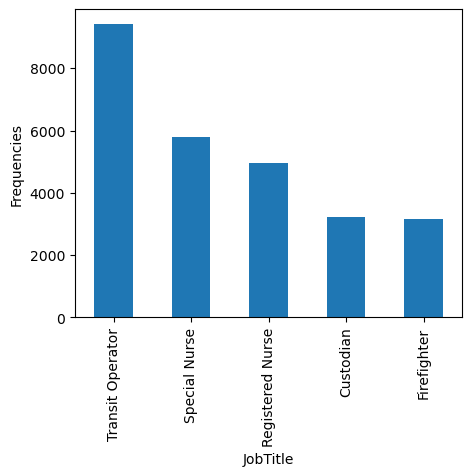

In [ ]:
# Bar plot of the top 5 JobTitles by frequency
top_5_jobs.plot.bar(
  xlabel="JobTitle",
  ylabel="Frequencies",
  figsize=(5,4)
)

In [39]:
salaries_2013 = salaries[salaries['Year'] == 2013]
grouped_jobs = salaries_2013.groupby(['JobTitle'])['EmployeeName'].nunique()
grouped_jobs

JobTitle
ASR Senior Office Specialist      21
ASR-Office Assistant              15
Account Clerk                     90
Accountant I                       3
Accountant II                     77
                                  ..
Wire Rope Cable Maint Sprv         1
Worker's Comp Supervisor 1         3
Worker's Compensation Adjuster    25
X-Ray Laboratory Aide             34
Youth Comm Advisor                 2
Name: EmployeeName, Length: 1051, dtype: int64

In [43]:
grouped_jobs[grouped_jobs == 1]

JobTitle
Acupuncturist                    1
Adm, SFGH Medical Center         1
Administrative Analyst I         1
Administrative Analyst II        1
Administrator, DPH               1
                                ..
Victim & Witness Technician      1
Water Meter Shop Supervisor 1    1
Wharfinger 1                     1
Window Cleaner Supervisor        1
Wire Rope Cable Maint Sprv       1
Name: EmployeeName, Length: 203, dtype: int64